#Data Visualization

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Dari dataset tersebut, akan divisualisasikan untuk:


1.   Memilih fitur yang akan digunakan
2.   Analisis data



In [1]:
#Import library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Data Load

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
#Kolom bertipe data object

df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [5]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile             

In [6]:
#Kolom yang bertipe data integer dan float

df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
#Descriptive Statistics

df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
0    4682
1     948
Name: Churn, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1


In [9]:
#Merge Data yang sama

#Di PreferredLoginDevice, 'Mobile Phone' dan 'Phone' digabung
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

#Di PreferredOrderCat, 'Mobile' dan 'Mobile Phone' digabung
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

#Di PreferredPaymentMode, 'COD' dan 'Cash on Delivery' digabung, dan 'CC' digabung dengan 'Credit Card'
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [10]:
df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [11]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

#Data Preprocessing



1.   Handling Missing Values
2.   Encoding
3.   Handling Outliers
4.   Handling Imbalanced Data



In [12]:
#Handling Missing Values

#Metode bfill = ganti missing value dengan nilai baris selanjutnya
#Simple imputer = ganti missing value dengan nilai descriptive statistic atau constant value
    #most_frequent = dengan nilai yang paling sering muncul
#Metode dropna = menghapus semua baris yang memiliki nilai null
#Metode ffill = ganti missing value dengan nilai non-missing baris sebelumnya
#KNN imputer = mengganti missing value dengan nilai mean dari nearest neighbor


0

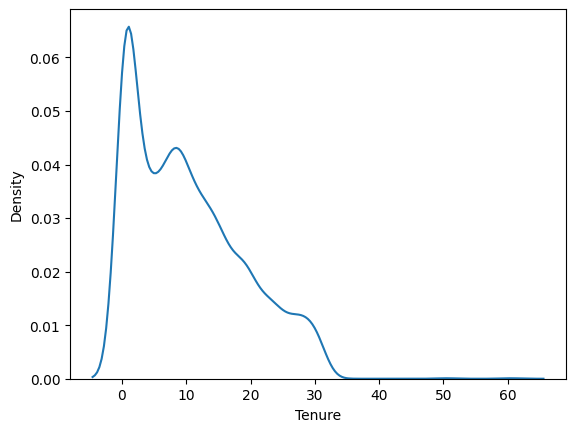

In [13]:
fill_list = df['Tenure'].dropna()
df['Tenure'] = df['Tenure'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['Tenure'].index))))
sns.kdeplot(df , x='Tenure')
df['Tenure'].isnull().sum()

0

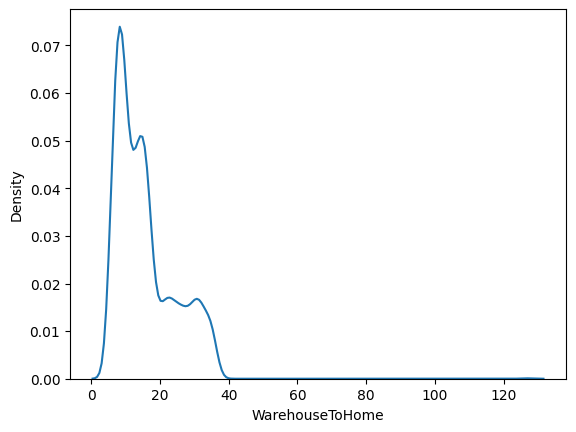

In [14]:
fill_list = df['WarehouseToHome'].dropna()
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['WarehouseToHome'].index))))
sns.kdeplot(df , x='WarehouseToHome')
df['WarehouseToHome'].isnull().sum()

0

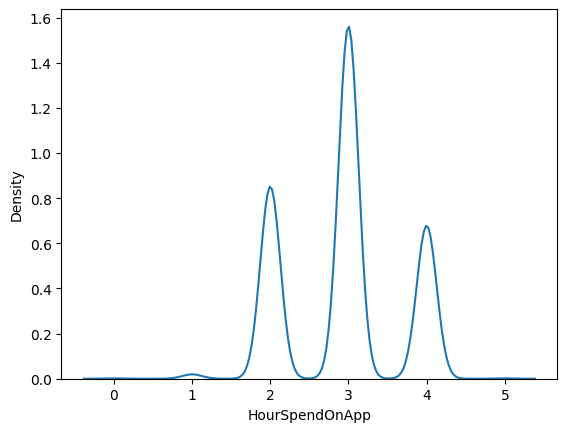

In [15]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))
sns.kdeplot(df , x='HourSpendOnApp')
df['HourSpendOnApp'].isnull().sum()

0

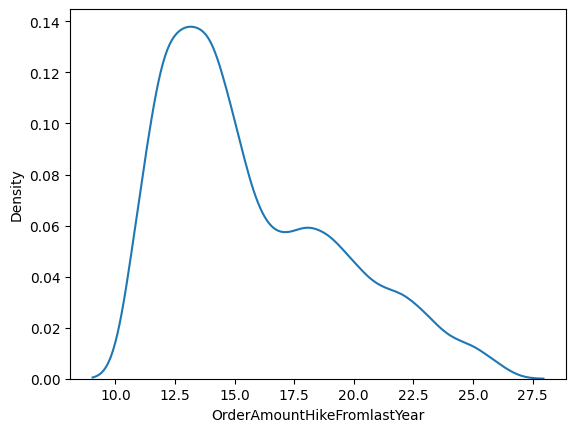

In [16]:
fill_list = df['OrderAmountHikeFromlastYear'].dropna()
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['OrderAmountHikeFromlastYear'].index))))
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

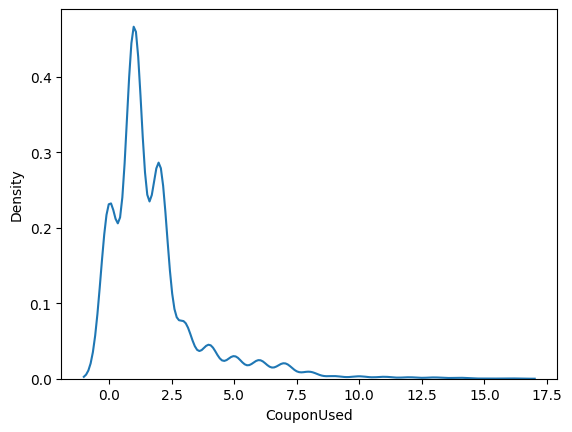

In [17]:
fill_list = df['CouponUsed'].dropna()
df['CouponUsed'] = df['CouponUsed'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['CouponUsed'].index))))
sns.kdeplot(df , x='CouponUsed')
df['CouponUsed'].isnull().sum()

0

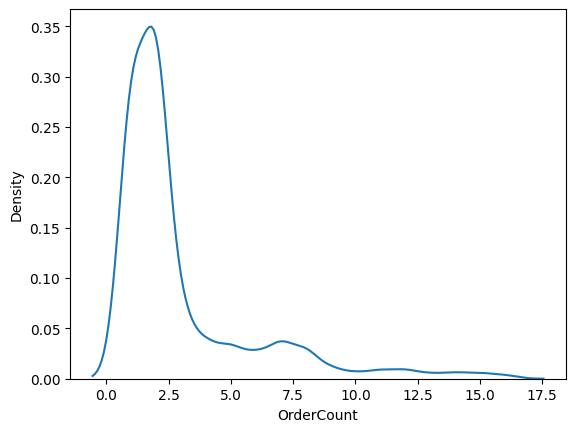

In [18]:
fill_list = df['OrderCount'].dropna()
df['OrderCount'] = df['OrderCount'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['OrderCount'].index))))
sns.kdeplot(df , x='OrderCount')
df['OrderCount'].isnull().sum()

0

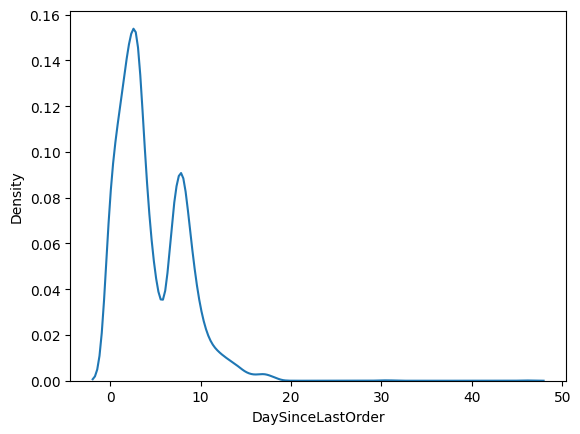

In [19]:
fill_list = df['DaySinceLastOrder'].dropna()
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['DaySinceLastOrder'].index))))
sns.kdeplot(df , x='DaySinceLastOrder')
df['DaySinceLastOrder'].isnull().sum()

In [20]:
#Drop Column Customer ID

df.drop('CustomerID' , axis = 1 , inplace = True)
df.shape

(5630, 19)

#Encoding

In [21]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,25.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,1,12.0,1,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


#Handling Outliers

Cara mengetahui Outliers:


1.   Normal Distribution = Data yang terdistribusi paling banyak di tengah dan sama rata di kanan dan kirinya.
2.   Skewed Distribution = Data yang berkumpul di sisi kanan atau kiri saja.

Normal Distribution menggunakan Standard Deviation sebagai batasannya. Jika data berada di 3*standard deviation, maka dianggap outliers. Visualisasi menggunakan KDE plot.

Untuk Skewed Distribution, menggunakan IQR (Inter-Quartile Range) sebagai batasannya.
Batas bawah = Q1 - IQR * 1.5;
Batas atas = Q3 + IQR * 1.5;
Visualisasi menggunakan Box Plot.


Cara handle outliers:


1.   Trimming = data outliers dibuang.
2.   Capping = merubah data outliers jadi nilai batas.
3.   Percentile = menentukan persentase nilai batas, dan melakukan trimming/capping jika data melewati nilai tersebut.



In [22]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

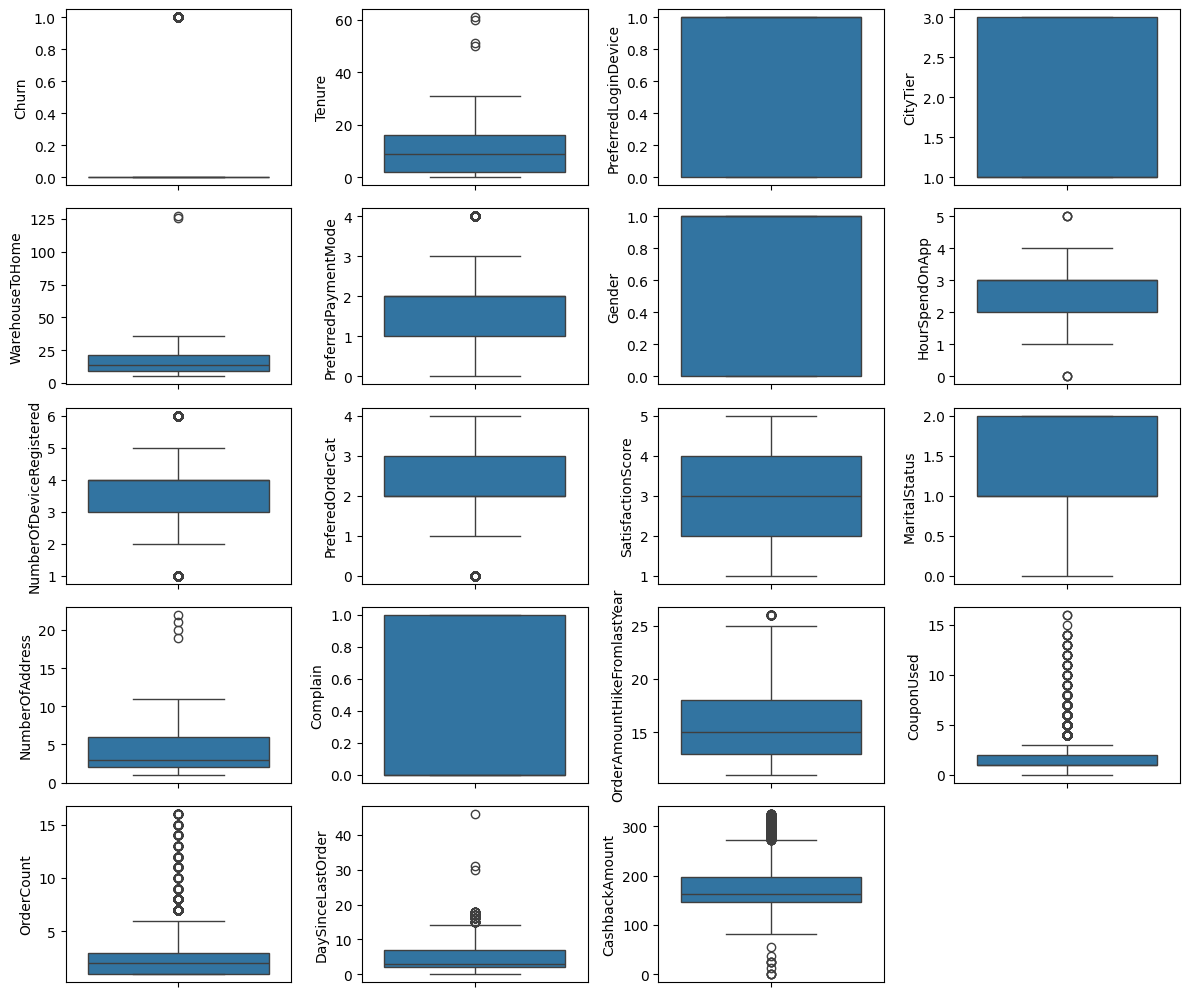

In [23]:
#BoxPlot sebelum trimming

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [24]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [25]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'PreferredPaymentMode', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'NumberOfAddress' , 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
2,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,1,12.0,1,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
6,1,5.0,1,3,11.0,0,1,2.0,3,2,2,0,4,0,14.0,0.0,1.0,0.0,120.86


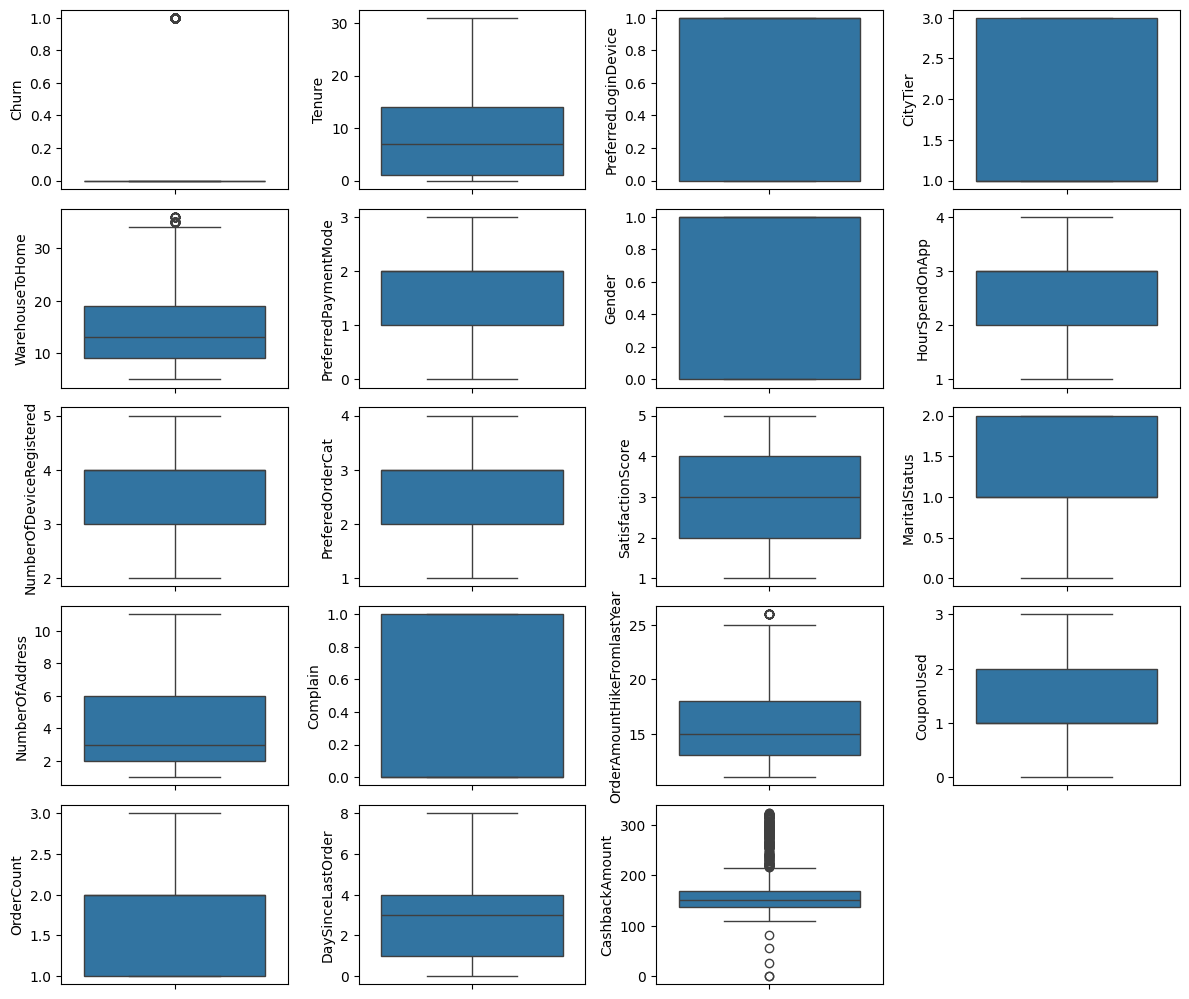

In [26]:
#Boxplot setelah Trimming

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [27]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.322620,-0.064865,0.046849,0.052072,-0.023521,0.039963,0.011232,0.099696,0.188402,0.152083,0.154512,0.007509,0.283420,0.004938,-0.018044,-0.006829,-0.174228,-0.178537
Tenure,-0.322620,1.000000,0.035769,-0.088281,-0.015167,0.026181,-0.062328,-0.035378,-0.030632,-0.195530,-0.023741,-0.109083,0.249886,-0.042603,0.008358,0.028726,0.019816,0.059064,0.380367
PreferredLoginDevice,-0.064865,0.035769,1.000000,-0.005762,-0.033423,0.027422,-0.005856,0.041066,0.001783,0.017288,0.055483,-0.006987,0.054564,-0.016763,0.006953,0.006827,-0.020381,-0.005969,0.051836
CityTier,0.046849,-0.088281,-0.005762,1.000000,0.040619,0.326127,-0.083590,-0.012168,0.025910,-0.258513,0.001578,0.014190,-0.031627,-0.009201,-0.083848,0.004805,-0.020089,0.004920,0.081222
WarehouseToHome,0.052072,-0.015167,-0.033423,0.040619,1.000000,0.013122,0.011437,0.030838,-0.014652,-0.095690,0.011857,-0.021314,0.014157,-0.006997,0.067645,0.003485,0.024373,0.032819,-0.017632
PreferredPaymentMode,-0.023521,0.026181,0.027422,0.326127,0.013122,1.000000,-0.035239,0.018746,-0.005126,-0.147689,-0.026592,-0.010326,-0.019195,0.030601,-0.025500,0.005763,-0.009652,-0.020754,0.097588
Gender,0.039963,-0.062328,-0.005856,-0.083590,0.011437,-0.035239,1.000000,-0.013805,-0.031787,0.092289,-0.047518,-0.039137,-0.040211,-0.055848,-0.028519,-0.002180,0.032083,-0.029143,-0.021953
HourSpendOnApp,0.011232,-0.035378,0.041066,-0.012168,0.030838,0.018746,-0.013805,1.000000,0.239178,0.076827,0.022302,-0.039272,0.146170,0.003000,0.122871,0.394286,0.467960,0.106183,0.146951
NumberOfDeviceRegistered,0.099696,-0.030632,0.001783,0.025910,-0.014652,-0.005126,-0.031787,0.239178,1.000000,0.024699,0.003975,0.051802,0.082048,0.002598,0.060002,0.247639,0.315482,0.008882,0.108323
PreferedOrderCat,0.188402,-0.195530,0.017288,-0.258513,-0.095690,-0.147689,0.092289,0.076827,0.024699,1.000000,0.026897,0.046626,-0.133220,0.021842,0.033282,0.005101,0.018366,-0.189230,-0.299234


<Axes: >

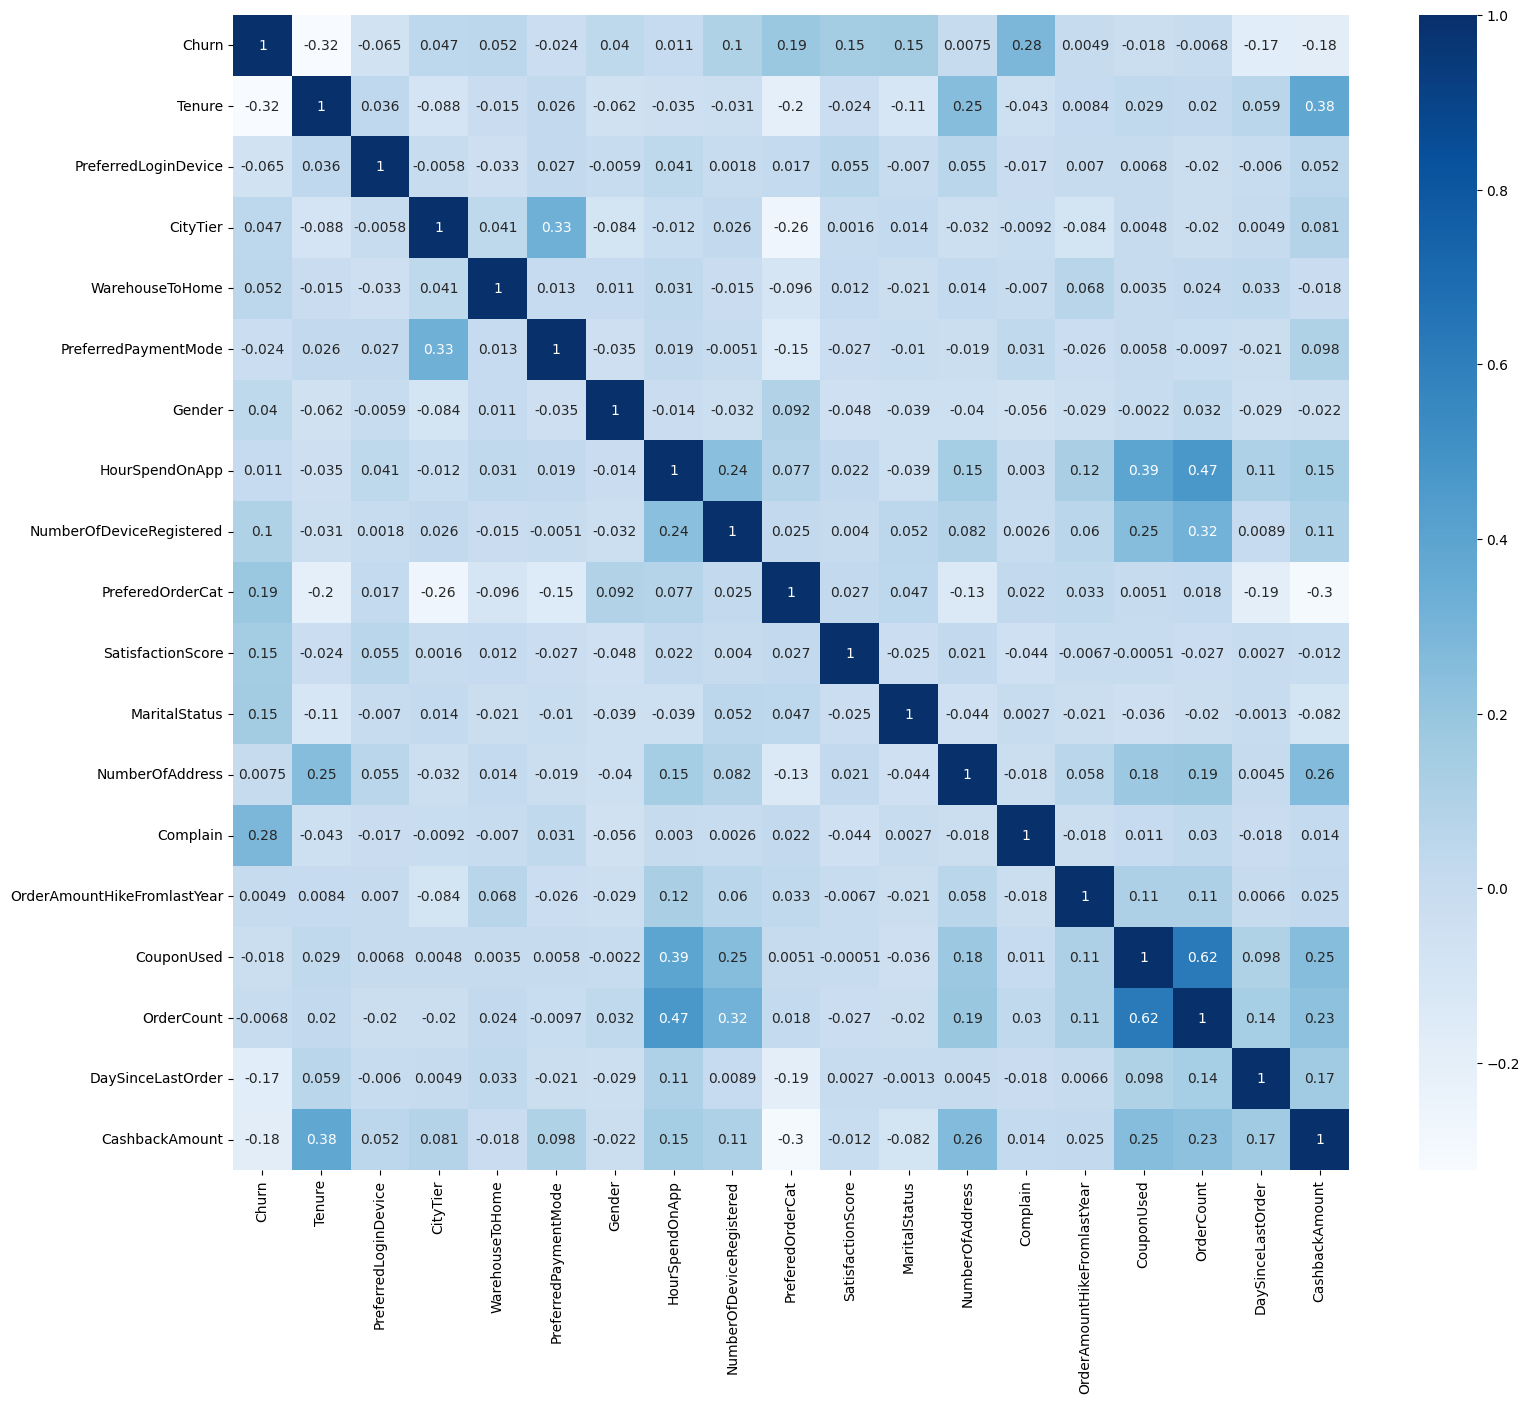

In [28]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [29]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.283420
PreferedOrderCat               0.188402
MaritalStatus                  0.154512
SatisfactionScore              0.152083
NumberOfDeviceRegistered       0.099696
WarehouseToHome                0.052072
CityTier                       0.046849
Gender                         0.039963
HourSpendOnApp                 0.011232
NumberOfAddress                0.007509
OrderAmountHikeFromlastYear    0.004938
OrderCount                    -0.006829
CouponUsed                    -0.018044
PreferredPaymentMode          -0.023521
PreferredLoginDevice          -0.064865
DaySinceLastOrder             -0.174228
CashbackAmount                -0.178537
Tenure                        -0.322620
Name: Churn, dtype: float64

In [30]:
import scipy
from scipy.stats import pearsonr
from pylab import rcParams


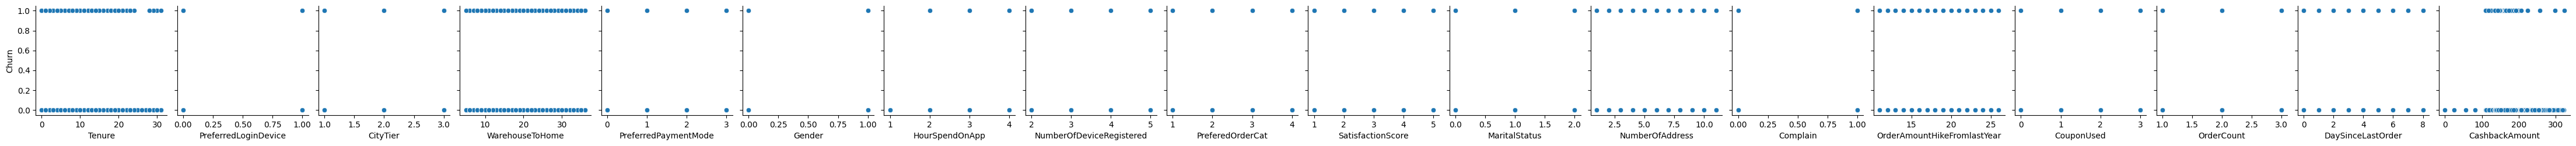

In [31]:
sns.pairplot(
    df,
    x_vars=['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
    y_vars=['Churn'],
)


In [32]:
#Variabel tidak continuous sehingga tidak qualify untuk menggunakan Pearson correlation

#Spearman correlation

from scipy.stats import spearmanr

x1 = df['Tenure']
x2 = df['PreferredLoginDevice']
x3 = df['CityTier']
x4 = df['WarehouseToHome']
x5 = df['PreferredPaymentMode']
x6 = df['Gender']
x7 = df['HourSpendOnApp']
x8 = df['NumberOfDeviceRegistered']
x9 = df['PreferedOrderCat']
x10 = df['SatisfactionScore']
x11 = df['MaritalStatus']
x12 = df['NumberOfAddress']
x13 = df['Complain']
x14 = df['OrderAmountHikeFromlastYear']
x15 = df['CouponUsed']
x16 = df['OrderCount']
x17 = df['DaySinceLastOrder']
x18 = df['CashbackAmount']
y = df['Churn']

#Tenure correlation to churn
spearmanr_coefficient, p_value = spearmanr(x1, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.395911


In [33]:
#PreferredLoginDevice correlation to churn

spearmanr_coefficient, p_value = spearmanr(x2, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.064865


In [34]:
#CityTier correlation to churn

spearmanr_coefficient, p_value = spearmanr(x3, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.046588


In [35]:
#WarehouseToHome correlation to churn

spearmanr_coefficient, p_value = spearmanr(x4, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.049664


In [36]:
#PreferredPaymentMode correlation to churn

spearmanr_coefficient, p_value = spearmanr(x5, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.018123


In [37]:
#Gender correlation to churn

spearmanr_coefficient, p_value = spearmanr(x6, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.039963


In [38]:
#HourSpendOnApp correlation to churn

spearmanr_coefficient, p_value = spearmanr(x7, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.009234


In [39]:
#NumberOfDeviceRegistered correlation to churn

spearmanr_coefficient, p_value = spearmanr(x8, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.095296


In [40]:
#PreferedOrderCat correlation to churn

spearmanr_coefficient, p_value = spearmanr(x9, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.202633


In [41]:
#SatisfactionScore correlation to churn

spearmanr_coefficient, p_value = spearmanr(x10, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.151485


In [42]:
#MaritalStatus correlation to churn

spearmanr_coefficient, p_value = spearmanr(x11, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.165586


In [43]:
#NumberOfAddress correlation to churn
spearmanr_coefficient, p_value = spearmanr(x12, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.000696


In [44]:
#Complain correlation to churn

spearmanr_coefficient, p_value = spearmanr(x13, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.283420


In [45]:
#OrderAmountHikeFromlastYear correlation to churn

spearmanr_coefficient, p_value = spearmanr(x14, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.011679


In [46]:
#CouponUsed correlation to churn

spearmanr_coefficient, p_value = spearmanr(x15, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.019840


In [47]:
#OrderCount correlation to churn

spearmanr_coefficient, p_value = spearmanr(x16, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.007679


In [48]:
#DaySinceLastOrder correlation to churn

spearmanr_coefficient, p_value = spearmanr(x17, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.189420


In [49]:
#CashbackAmount correlation to churn

spearmanr_coefficient, p_value = spearmanr(x18, y)
print('Spearman Rank Correlation Coefficient %0.6f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.207326


In [50]:
#Spearman Rank Correlation Coefficient

#Churn                          1.000000
#Complain                       0.280650
#PreferedOrderCat               0.208047
#SatisfactionScore              0.151565
#MaritalStatus                  0.161792
#NumberOfDeviceRegistered       0.096503
#CityTier                       0.044346
#Gender                         0.044361
#WarehouseToHome                0.035847
#HourSpendOnApp                 0.009042
#NumberOfAddress                -0.001120
#OrderAmountHikeFromlastYear    -0.010234
#OrderCount                     -0.009999
#CouponUsed                     -0.020084
#PreferredPaymentMode           -0.020484
#PreferredLoginDevice           -0.062430
#DaySinceLastOrder              -0.190218
#CashbackAmount                 -0.212095
#Tenure                         -0.410801
#Name: Churn, dtype: float64


Dari Spearman Rank Correlation Coefficient tersebut, 5 variabel yang paling berkorelasi positif dengan label churn adalah:


1.   Complain (korelasi positif, dengan selisih 0.719350)
2.   PreferedOrderCat (korelasi positif, dengan selisih 0.791953)
3.   MaritalStatus (korelasi positif, dengan selisih 0.838208)
4.   SatisfactionScore (korelasi positif, dengan selisih 0.848435)
5.   NumberOfDeviceRegistered (korelasi positif, dengan selisih 0.903497)

Variabel tersebut akan digunakan sebagai fitur yang akan digunakan dalam algoritma klasifikasi untuk prediksi churn.


Sedangkan, untuk algoritma clustering untuk mengetahui pengelompokkan dari fitur-fiturnya, kami menggunakan fitur-fitur berikut ini karena terlihat memiliki korelasi yang cukup tinggi antara satu dan lainnya.
1.   OrderCount
2.   CouponUsed
3.   HourSpendOnApp

#Handling Imbalanced Data

Over-sampling menggunakan SMOTE (Synthetic Minority Over-sampling Technique)
    interpolasi data
Cleaning menggunakan Tomek links  
    undersampling

In [51]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [52]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [53]:
from imblearn.combine import SMOTETomek

In [54]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [55]:
x_over.shape, y_over.shape

((4836, 18), (4836,))